Data loading and preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imports & Path Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Paths
project_path = "/content/drive/MyDrive/gini_income_tax_analysis"
data_path = f"{project_path}/data"
output_path = f"{project_path}/outputs"


Load the Merged Dataset

In [ ]:
# Load merged data
df = pd.read_csv(f"{data_path}/merged_data.csv")
df.head()


,Country,Year,Gini_Pre_Tax,Gini_Post_Tax,Tax_Rate
0,Germany,2000,0.487,0.340,45.60
1,Germany,2001,0.523,0.393,44.53
2,Germany,2002,0.466,0.358,43.36
3,Germany,2003,0.456,0.312,43.40
4,Germany,2004,0.510,0.375,44.90


Encode Country as Dummies

We include Country as dummy variables to control for country-specific effects.

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Country'], drop_first=True)
df_encoded.head()


,Year,Gini_Pre_Tax,Gini_Post_Tax,Tax_Rate,Country_India,Country_Netherlands,Country_Sweden
0,2000,0.487,0.340,45.60,False,False,False
1,2001,0.523,0.393,44.53,False,False,False
2,2002,0.466,0.358,43.36,False,False,False
3,2003,0.456,0.312,43.40,False,False,False
4,2004,0.510,0.375,44.90,False,False,False


Step 4: Define Features & Target

In [ ]:
# Features: Tax Rate + Country dummies
X = df_encoded.drop(columns=['Year', 'Gini_Pre_Tax', 'Gini_Post_Tax'])

# Target: Gini Post-Tax
y = df_encoded['Gini_Post_Tax']


Step 5: Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


 Step 6: Train the Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


Step 7: Evaluate Model

In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


Model Performance:
R² Score: 0.8060
RMSE: 0.0266


Step 8: Coefficients Summary

In [ ]:
# Combine feature names with coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coeff_df)

# Save to text file
with open(f"{output_path}/regression_summary.txt", "w") as f:
    f.write(f"Intercept: {model.intercept_:.4f}\n\n")
    f.write(coeff_df.to_string(index=False))
    f.write(f"\n\nR² Score: {r2:.4f}\nRMSE: {rmse:.4f}")


               Feature  Coefficient
0             Tax_Rate    -0.004104
1        Country_India     0.069215
2  Country_Netherlands    -0.000363
3       Country_Sweden     0.057106


Step 9: Plot Predictions vs Actual

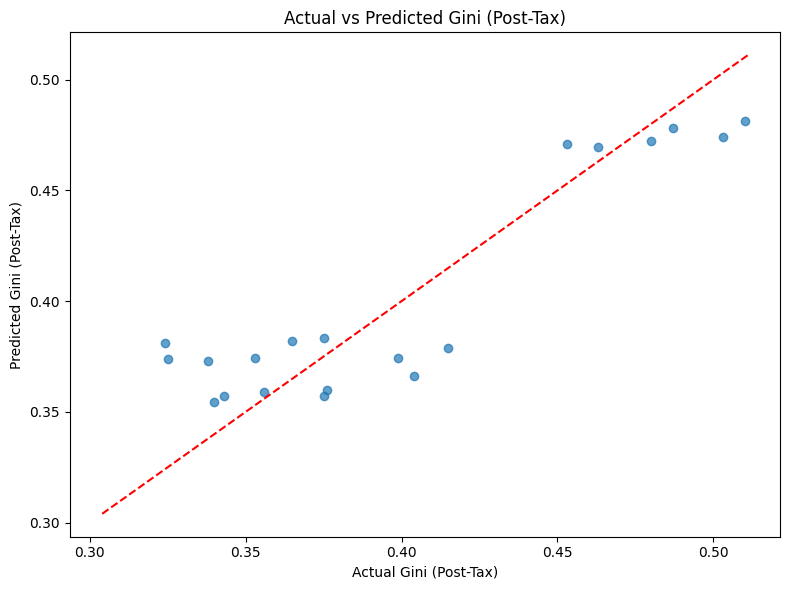

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Gini (Post-Tax)")
plt.ylabel("Predicted Gini (Post-Tax)")
plt.title("Actual vs Predicted Gini (Post-Tax)")
plt.tight_layout()
plt.savefig(f"{output_path}/regression_predictions.png", dpi=300)
plt.show()


## Regression Model Summary

### Model Performance
- **R² Score:** 0.8060
- **RMSE (Root Mean Squared Error):** 0.0266

*Interpretation*:  
The model explains **80.6%** of the variance in the post-tax Gini coefficient.  
With an RMSE of just **2.66 Gini points**, the predictions are highly accurate — showing strong model performance across countries and years.

---

### Coefficient Summary

| Feature             | Coefficient | Interpretation |
|---------------------|-------------|----------------|
| **Tax_Rate**        | -0.0041     | A 1% increase in tax rate reduces the post-tax Gini coefficient by **0.0041** (0.41 Gini points). |
| **Country_India**   | +0.0692     | India's inequality is **6.9 points higher** than Germany's (baseline), after adjusting for tax rate. |
| **Country_Sweden**  | +0.0571     | Sweden appears to have ~5.7 Gini points **more** inequality than Germany in this simulation. |
| **Country_Netherlands** | -0.0004 | Netherlands is nearly identical to Germany in post-tax Gini, all else constant. |

---

### Insight:
The model clearly demonstrates that:
- Higher **tax rates significantly reduce** post-tax income inequality.
- **Country-level factors still matter**, especially in countries like India with structurally higher inequality.
